# Lab 03 Linear Regression

2020.07.31 김채형

## 1. Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Simple Linear Regression

1. MASS에서 Boston Dataset 불러오기  

In [2]:
# 데이터 불러오기
boston = pd.read_csv('datasets/Boston.csv', index_col=0)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# 데이터 행 x 열 확인
boston.shape

(506, 14)

2. Boston Dataset에서 medv를 종속변수, lstat를 Predictor로 하여 Simple Linear Regression을 수행하고  
  1) coefficients값  
  2) 각 coefficients의 유의미 여부   
  3) R Square 값을 구하라.

**sckit-learn**

In [4]:
from sklearn import linear_model

In [5]:
# features, target 선언
x_train = boston['lstat'].values.reshape(-1,1)
y_true = boston['medv']

In [6]:
# 모델 선언 : define ols model with intercept
ols_sl = linear_model.LinearRegression(fit_intercept=True)

In [7]:
# 모델 적합 : fitting ols model
ols_sl.fit(x_train, y_true)

LinearRegression()

In [8]:
# 모델 결과 확인
ols_sl.intercept_, ols_sl.coef_

(34.55384087938311, array([-0.95004935]))

In [9]:
# 예측 : prediction
y_pred = ols_sl.predict(boston['lstat'].values.reshape(-1,1))

In [10]:
# 모델 평가
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

ols_sl_summary = {'R2':r2_score(y_true, y_pred),
                  'Ex. Var':explained_variance_score(y_true, y_pred),
                  'MSE':mean_squared_error(y_true, y_pred)}

for k, v in ols_sl_summary.items(): # ols_sl_summary 라는 딕셔너리의 key값과 value값이 각각 k와 v에 할당 
    print(k, ':', v)

R2 : 0.5441462975864799
Ex. Var : 0.5441462975864798
MSE : 38.48296722989414


In [11]:
# 예측 : out-of-sample predictions
ols_sl.predict(np.array([5,10,15]).reshape(-1,1))

array([29.80359411, 25.05334734, 20.30310057])

3. lstat 값이 5, 10, 15일 때 각각의 기대값과 기대값의 prediction interval과 confidence interval을 구하라.

**statsmodels**

In [12]:
import statsmodels.api as sm

In [13]:
# features, target 선언
x_train = boston['lstat']
y_true = boston['medv']

In [14]:
# 모델 선언 : ols model with intercept added to predictor
ols_sm = sm.OLS(y_true, sm.add_constant(x_train))

In [15]:
# 모델 적합 : fitted model and summary
ols_sm_results = ols_sm.fit()

In [16]:
# 모델 결과 확인
ols_sm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 31 Jul 2020   Prob (F-statistic):           5.08e-88
Time:                        20:25:35   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# 예측 : out-of-sample predictions
ols_sm_results.predict(sm.add_constant([5,10,15]))

array([29.80359411, 25.05334734, 20.30310057])

In [18]:
# prediction intervals
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from collections import OrderedDict

y_pred = ols_sm_results.predict(sm.add_constant(x_train))
prstd, iv_l, iv_u = wls_prediction_std(ols_sm_results)

pred_dict = OrderedDict({'x_train': x_train,
                         'y_pred': y_pred, 
                         'y_true': y_true, 
                         'lwr': iv_l, 
                         'upr': iv_u, 
                         'pred_se': prstd})

pd.DataFrame(pred_dict)

,x_train,y_pred,y_true,lwr,upr,pred_se
1,4.98,29.822595,24.0,17.584603,42.060587,6.228994
2,9.14,25.870390,21.6,13.643413,38.097367,6.223387
3,4.03,30.725142,34.7,18.483488,42.966796,6.230858
4,2.94,31.760696,33.4,19.514315,44.007076,6.233264
5,5.33,29.490078,36.2,17.253328,41.726828,6.228362
...,...,...,...,...,...,...
502,9.67,25.366864,22.4,13.140702,37.593025,6.222972
503,9.08,25.927393,20.6,13.700315,38.154470,6.223438
504,5.64,29.195563,23.9,16.959864,41.431261,6.227826
505,6.48,28.397521,22.0,16.164444,40.630598,6.226492


4. 회귀식을 plot으로 표현하라.

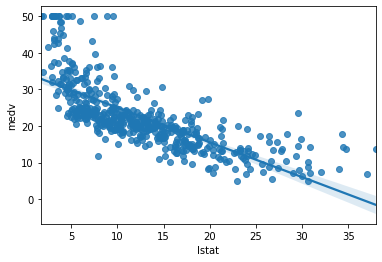

In [19]:
# Regression plot
sns.regplot('lstat', 'medv', data=boston)

## 3. Multiple Linear Regression

1. lstat과 더불어 age변수를 추가하여 Multiple Linear Regression을 수행해서   
    1) coefficients 값  
    2) 각 coefficients의 유의미 여부  
    3) R Square 값을 구하라

In [20]:
# features, target 선언
x_train = boston[['lstat', 'age']]
y_true = boston['medv']

In [21]:
# 모델 선언 : ols model with intercept added to predictor
ols_sm = sm.OLS(y_true, sm.add_constant(x_train))

In [22]:
# 모델 적합 : fitting ols model
ols_sm_results = ols_sm.fit()

In [23]:
# 모델 결과 확인
ols_sm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Fri, 31 Jul 2020   Prob (F-statistic):           2.98e-88
Time:                        20:25:36   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2. car library의 vif 함수를 이용해서 모든 변수의 다중공선성여부를 판단하라.

In [24]:
# variance inflation factors
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# don't forget to add constant if the ols model includes intercept
boston_exog = sm.add_constant(boston.drop('medv', axis=1))

# too fancy for printing results?
for i, col in enumerate(boston_exog.columns):
    if col == 'const':
        pass
    elif len(col) > 6:
        print(col, ':', "{0:.2f}".format(vif(boston_exog.values, i)))
    else:
        print(col, '\t:', "{0:.2f}".format(vif(boston_exog.values, i)))

crim 	: 1.79
zn 	: 2.30
indus 	: 3.99
chas 	: 1.07
nox 	: 4.39
rm 	: 1.93
age 	: 3.10
dis 	: 3.96
rad 	: 7.48
tax 	: 9.01
ptratio : 1.80
black 	: 1.35
lstat 	: 2.94


## 4. Interaction Terms

1. lstat과 age변수의 Interaction Term의 Coefficients값과 계수의 유의미를 판단하라.

In [25]:
import statsmodels.formula.api as smf

In [26]:
# 모델 선언 : ols model with intercept
ols_smf = smf.ols(formula='medv ~ lstat * age', data=boston)

In [27]:
# 모델 적합
ols_smf_results = ols_smf.fit()

In [28]:
# 모델 결과 확인
ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Fri, 31 Jul 2020   Prob (F-statistic):           4.86e-88
Time:                        20:25:36   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 5. Non-linear Transformation

1. lstat 변수를 2차원으로 확장해서 linear regression을 수행하라.

In [29]:
# anova of the two models
ols_smf1 = smf.ols(formula='medv ~ lstat', data=boston).fit()
ols_smf2 = smf.ols(formula='medv ~ lstat + np.power(lstat,2)', data=boston).fit()
sm.stats.anova_lm(ols_smf1, ols_smf2)

/Users/kimchaehyeong/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


## 6. Qualitative Predictors

1. ISLR Library 내의 Carseats 데이터에서 Sales를 종속변수로 하고 나머지 변수들을 모두 사용해서 Linear Regression을 수행하라.

In [30]:
# 데이터 불러오기
carseats = pd.read_csv('datasets/Carseats.csv', index_col=0)
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [31]:
# 데이터 행 x 열 확인
carseats.shape

(400, 11)

In [32]:
carseats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 37.5+ KB


In [33]:
# 더미 변수 생성
carseats_num = pd.get_dummies(carseats)

In [34]:
carseats_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             400 non-null    float64
 1   CompPrice         400 non-null    int64  
 2   Income            400 non-null    int64  
 3   Advertising       400 non-null    int64  
 4   Population        400 non-null    int64  
 5   Price             400 non-null    int64  
 6   Age               400 non-null    int64  
 7   Education         400 non-null    int64  
 8   ShelveLoc_Bad     400 non-null    uint8  
 9   ShelveLoc_Good    400 non-null    uint8  
 10  ShelveLoc_Medium  400 non-null    uint8  
 11  Urban_No          400 non-null    uint8  
 12  Urban_Yes         400 non-null    uint8  
 13  US_No             400 non-null    uint8  
 14  US_Yes            400 non-null    uint8  
dtypes: float64(1), int64(7), uint8(7)
memory usage: 30.9 KB


In [35]:
# features, target 선언
x_train = carseats_num.drop(columns=['Sales'])
y_true = carseats_num['Sales']

In [36]:
# 모델 선언 : ols model with intercept added to predictor
ols_sm = ols_sm = sm.OLS(y_true, sm.add_constant(x_train))

In [37]:
# 모델 적합 : fitting ols model
ols_sm_results = ols_sm.fit()

In [38]:
# 모델 결과 확인
ols_sm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Fri, 31 Jul 2020   Prob (F-statistic):          1.60e-166
Time:                        20:25:36   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.3853      0.253     13.370      0.000       2.887       3.883
CompPrice            0.0928      0.004     22.378      0.000       0.085       0.101
Income               0.0158      0.002      8.565      0.000       0.012       0.019
Advertising          0.1231      0.011     11.066      0.000       0.101       0.145
Population           0.0002      0.000      0.561      0.575      -0.001       0.001
Price               -0.0954      0.003    -35.700      0.000      -0.101      -0.090
Age                 -0.0460      0.003    -14.472      0.000      -0.052      -0.040
Education           -0.0211      0.020     -1.070      0.285      -0.060       0.018
ShelveLoc_Bad       -1.1405      0.118     -9.629      0.000      -1.373      -0.908
ShelveLoc_Good       3.7096      0.121     30.652      0.000       3.472       3.948
ShelveLoc_Medium     0.8162      0.107      7.605      0.000       0.605       1.027
Urban_No             1.6312      0.138     11.789      0.000       1.359       1.903
Urban_Yes            1.7541      0.139     12.629      0.000       1.481       2.027
US_No                1.7847      0.146     12.243      0.000       1.498       2.071
US_Yes               1.6006      0.148     10.783      0.000       1.309       1.892
==============================================================================
Omnibus:                        0.811   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.765
Skew:                           0.107   Prob(JB):                        0.682
Kurtosis:                       2.994   Cond. No.                     4.29e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.65e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

2. Qualitative Predictor인 ShelveLoc이 어떻게 coding으로 구현되었는지 확인. 또는 어떤 Dummy Variable 형태로 변환되었는지 확인.

In [39]:
original = carseats[['ShelveLoc', 'Urban', 'US']]
prep = carseats_num[['ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes']]

In [40]:
compare = pd.concat([original, prep], axis=1)
compare = compare[['ShelveLoc', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium', 
                   'Urban', 'Urban_No', 'Urban_Yes', 'US', 'US_No', 'US_Yes']]
compare

,ShelveLoc,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban,Urban_No,Urban_Yes,US,US_No,US_Yes
1,Bad,1,0,0,Yes,0,1,Yes,0,1
2,Good,0,1,0,Yes,0,1,Yes,0,1
3,Medium,0,0,1,Yes,0,1,Yes,0,1
4,Medium,0,0,1,Yes,0,1,Yes,0,1
5,Bad,1,0,0,Yes,0,1,No,1,0
...,...,...,...,...,...,...,...,...,...,...
396,Good,0,1,0,Yes,0,1,Yes,0,1
397,Medium,0,0,1,No,1,0,Yes,0,1
398,Medium,0,0,1,Yes,0,1,Yes,0,1
399,Bad,1,0,0,Yes,0,1,Yes,0,1
